**Problem Statement & Objective**

Problem Statement: E-commerce businesses generate vast amounts of transactional data but often struggle to leverage it for actionable customer segmentation. Understanding purchasing patterns is crucial for predicting behavior, improving retention, reducing churn, and maximizing customer lifetime value. A structured approach is needed to identify high-value customers, detect trends, and optimize targeted marketing strategies.

Objective:

Utilize the RFM (Recency, Frequency, Monetary) framework to segment e-commerce customers.
Analyze purchasing patterns to identify high-value customers and at-risk segments.
Create targeted marketing strategies to improve customer retention and satisfaction.

**Data Overview**

In [1]:
# Importing the pandas library, which is a powerful tool for data analysis and manipulation in Python.
# Pandas provides structures like DataFrame to handle tabular data (rows and columns) efficiently.
import pandas as pd

#Load the dataset
# The resulting DataFrame is stored in a variable named 'df'.
df = pd.read_excel("/Users/rohin/Desktop/Tableau/E-commerce RFM analysis/online_retail.xlsx",sheet_name="Year 2010-2011")

print("Shape of the dataset (rows, columns):", df.shape)

Shape of the dataset (rows, columns): (541910, 8)


In [2]:
print("\nDataset Information:")
print(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      541910 non-null  object        
 1   StockCode    541910 non-null  object        
 2   Description  540456 non-null  object        
 3   Quantity     541910 non-null  int64         
 4   InvoiceDate  541910 non-null  datetime64[ns]
 5   Price        541910 non-null  float64       
 6   Customer ID  406830 non-null  float64       
 7   Country      541910 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None


**Insights**

1. As we can see there are missing values in 'Description' & 'CustomerID' columns
2. Customer ID, Price and Quantity are numerical columns
3. InvoiceDate should be converted into Datetime

In [3]:
 #Unique Countries
print("\n Unique Countries in Dataset:")
print(df['Country'].unique())


 Unique Countries in Dataset:
['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Bahrain' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Czech Republic' 'Canada' 'Unspecified' 'Brazil' 'USA'
 'European Community' 'Malta' 'RSA']


In [4]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,541910.000000,541910,541910.000000,406830.000000
mean,9.552234,2011-07-04 13:35:22.342307584,4.611138,15287.684160
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.080957,NaN,96.759765,1713.603074


**Insights**

1. The minimum value for Quantity and UnitPrice are negative, which we will handle later
2. The Standard Deviation for the columns is also very high, which means there is large variation in the data
3. The mean value is also greater than the median value, which means the dataset is right-skewed due to outliers which can also be seen from the min and the max values

In [5]:
df.describe(include='object')

,Invoice,StockCode,Description,Country
count,541910,541910,540456,541910
unique,25900,4070,4223,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,1114,2313,2369,495478


**Insights**

1. This ecommerce store operates in 38 countries
2. The unique number of Invoice is much less than the count, which means that multiple orders are placed using a single Invoice number
3. The unique number of StockCode is less than the unique number of Description. Some products may have multiple description

**Handling Missing Values**

In [6]:
# Checking for null values in each column
null_values = df.isnull().sum()

# Displaying all null values
print("Null Values in Each Column:")
print(null_values)

Null Values in Each Column:
Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135080
Country             0
dtype: int64


**Handling Duplicates**

In [7]:
# Remove rows where Customer ID is missing
df = df[df['Customer ID'].notnull()]

#Dropping the duplicates and keeping the first occurence
df.drop_duplicates(inplace=True)

# Remove cancelled orders (invoices starting with 'C')
df = df[~df['Invoice'].astype(str).str.startswith('C')]

# Convert InvoiceDate column from string/object to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# (Optional): Keep only UK customers for focused analysis
# df = df[df['Country'] == 'United Kingdom']

# Reset the index after cleaning (drop old index)
df.reset_index(drop=True, inplace=True)

# Checking the shape after dropping the duplicate
df.shape

(392733, 8)

In [8]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,392733.000000,392733,392733.000000,392733.000000
mean,13.153687,2011-07-10 19:15:57.956932608,3.125633,15287.728182
min,1.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13955.000000
50%,6.000000,2011-07-31 12:02:00,1.950000,15150.000000
75%,12.000000,2011-10-20 12:53:00,3.750000,16791.000000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000
std,181.588189,NaN,22.240710,1713.570644


In [9]:
#Create the Revenue column
df['Revenue'] = df['Quantity'] * df['Price']

In [10]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


# **EDA**

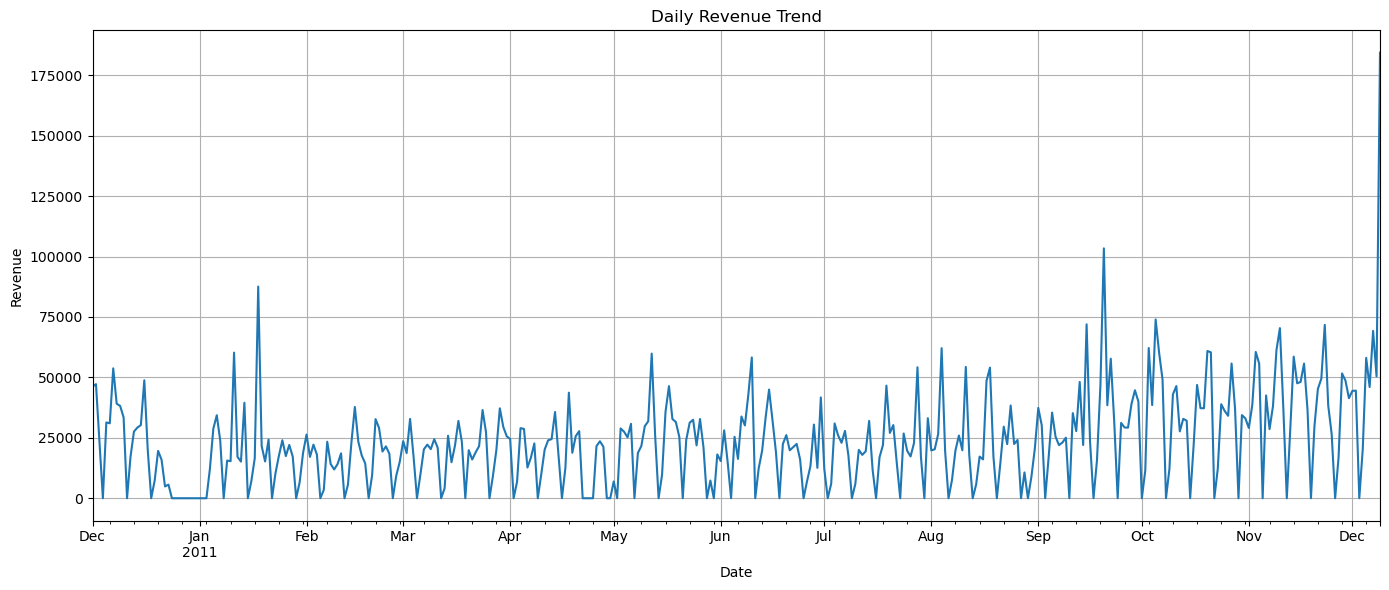

In [11]:
# 1.Sales over time

import matplotlib.pyplot as plt

# Group the data by day and sum up 'Revenue'
# - 'resample("D")': Groups the data into daily intervals (D = Day)
# This is required for resampling because resample() works on a datetime index
daily_sales = df.set_index('InvoiceDate').resample('D')['Revenue'].sum()

#plot
# Create a new figure with a specific size (width=14, height=6 inches)
plt.figure(figsize=(14, 6))

# Plot the daily_sales Series (Date on x-axis, Revenue on y-axis)
daily_sales.plot()

# Add title to the plot
plt.title('Daily Revenue Trend')

# Add label for x-axis
plt.xlabel('Date')

# Add label for y-axis
plt.ylabel('Revenue')

# Show grid lines for better readability
plt.grid(True)

# Adjust spacing so labels/titles are not cut off
plt.tight_layout()

# Display the plot
plt.show()



--- Daily Revenue Metrics Summary ---
                  Metric                Value
0  Average Daily Revenue         23762.638754
1   Median Daily Revenue            21819.325
2        Max Revenue Day  2011-12-09 00:00:00
3      Max Revenue Value            184347.66
4  Dec vs Jan % Increase            91.450213
5        Revenue Std Dev           19681.0749


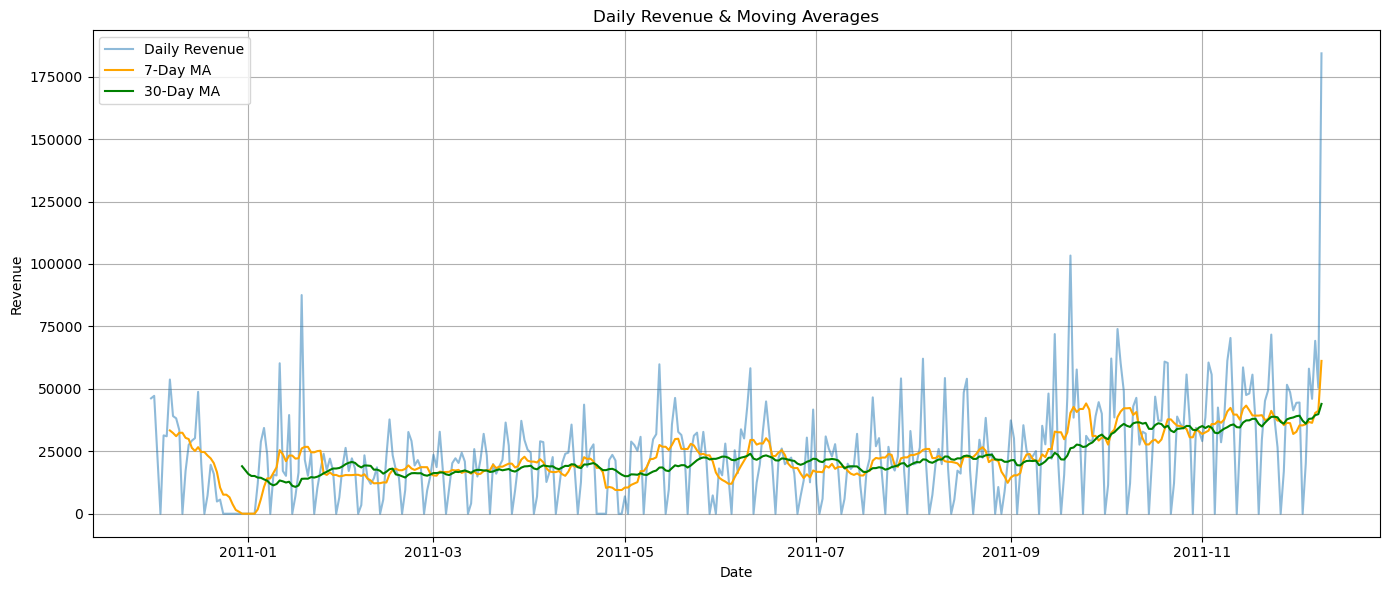

In [12]:
# --- 1. Average Daily Revenue ---
average_daily_revenue = daily_sales.mean()

# --- 2. Median Daily Revenue ---
median_daily_revenue = daily_sales.median()

# --- 3. Max Revenue Day ---
max_revenue_day = daily_sales.idxmax()  # date
max_revenue_value = daily_sales.max()   # revenue

# --- 4. % Increase Dec vs Jan ---
jan_revenue = daily_sales[daily_sales.index.month == 1].sum()
dec_revenue = daily_sales[daily_sales.index.month == 12].sum()
if jan_revenue != 0:
    percent_increase = ((dec_revenue - jan_revenue) / jan_revenue) * 100
else:
    percent_increase = None

# --- 5. Standard Deviation ---
revenue_std = daily_sales.std()

# --- 6. Moving Averages ---
MA_7 = daily_sales.rolling(window=7).mean()
MA_30 = daily_sales.rolling(window=30).mean()

# --- 7. Summary Table ---
summary = pd.DataFrame({
    'Metric': [
        'Average Daily Revenue',
        'Median Daily Revenue',
        'Max Revenue Day',
        'Max Revenue Value',
        'Dec vs Jan % Increase',
        'Revenue Std Dev'
    ],
    'Value': [
        average_daily_revenue,
        median_daily_revenue,
        max_revenue_day,
        max_revenue_value,
        percent_increase,
        revenue_std
    ]
})

print("\n--- Daily Revenue Metrics Summary ---")
print(summary)

# --- 8. Plot Daily Revenue & Moving Averages ---
plt.figure(figsize=(14, 6))
plt.plot(daily_sales.index, daily_sales, label='Daily Revenue', alpha=0.5)
plt.plot(daily_sales.index, MA_7, label='7-Day MA', color='orange')
plt.plot(daily_sales.index, MA_30, label='30-Day MA', color='green')
plt.title('Daily Revenue & Moving Averages')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [ ]:
# Top 10 Most Sold Products

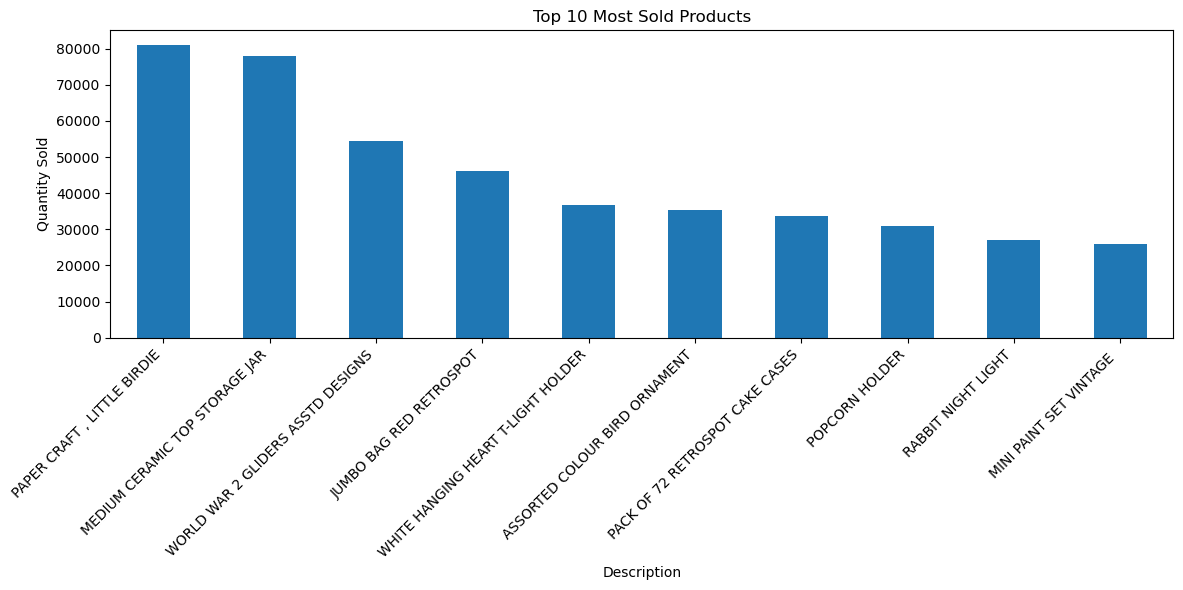

In [13]:
# Group data by product and sum the quantities
top_products = df.groupby('Description')['Quantity'].sum()

# Sort the products by quantity sold in descending order
top_products = top_products.sort_values(ascending=False)

# Select the top 10 best-selling products
top_products = top_products.head(10)

# Create a figure for the bar chart
plt.figure(figsize=(12,6))

# Plot a bar chart for top products
top_products.plot(kind='bar')

# Add title and axis labels
plt.title('Top 10 Most Sold Products')
plt.ylabel('Quantity Sold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Display the plot
plt.show()


In [96]:
#  Revenue by Country (Excluding UK)

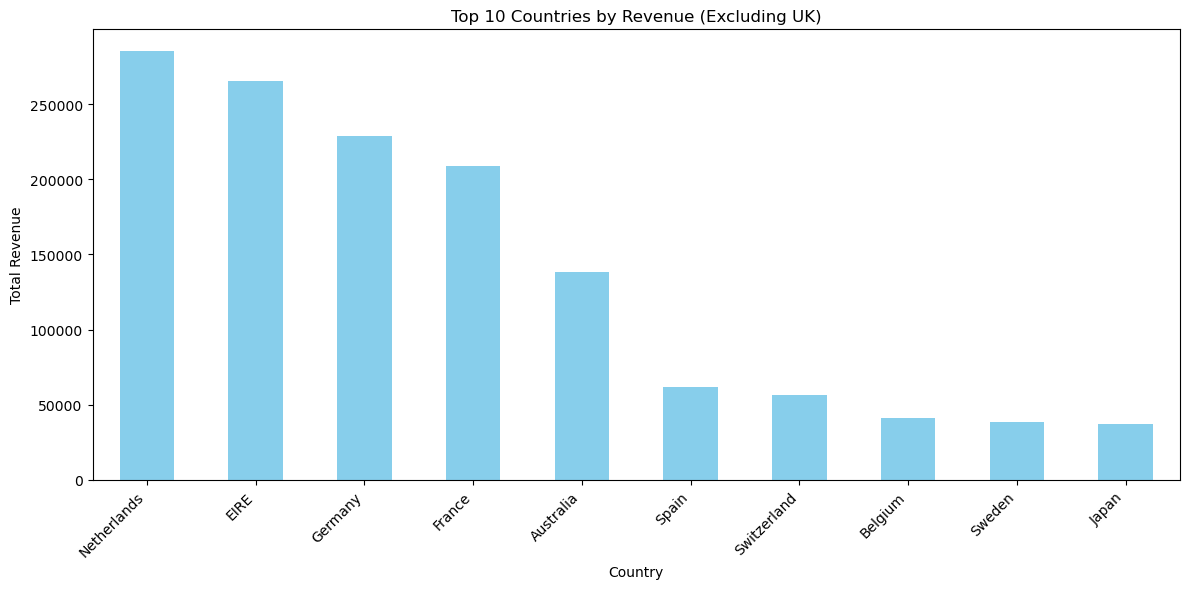

In [14]:
# Exclude UK and sum revenue by country
revenue_by_country = df[df['Country'] != 'United Kingdom'] \
                      .groupby('Country')['Revenue'] \
                      .sum() \
                      .sort_values(ascending=False) \
                      .head(10)

# Set the size of the figure
plt.figure(figsize=(12,6))


# kind='bar' creates vertical bars
# color='skyblue' sets the bar color
revenue_by_country.plot(kind='bar', color='skyblue')


# Add title and labels
plt.title('Top 10 Countries by Revenue (Excluding UK)')  # Chart title
plt.ylabel('Total Revenue')                                # Y-axis label


# Rotate X-axis labels for readability
# rotation=45 rotates labels 45 degrees
# ha='right' aligns labels to the right
plt.xticks(rotation=45, ha='right')

# Adjust layout
# Prevents overlapping of labels and title
plt.tight_layout()

# Show the plot
plt.show()

**Pareto Principle**

80% of the Revenue comes from 20% of the total customers

In [15]:
# Calcuate total sales per customer
sales_per_customer = df.groupby('Customer ID')['Revenue'].sum().reset_index()
sales_per_customer = sales_per_customer.sort_values(by='Revenue',ascending=False).reset_index(drop=True)

# Creating a new column "Cumulative percentage"
sales_per_customer['CumulativePercentage'] = (sales_per_customer['Revenue'].cumsum()*100)/sales_per_customer['Revenue'].sum()

# Verifying the the Pareto Principle
percentage = round((len(sales_per_customer[sales_per_customer['CumulativePercentage'] < 80])*100)/len(sales_per_customer))
print(f'{percentage}% of customers contribute to 80% of sales')

26% of customers contribute to 80% of sales


**20% of Products contribute to 80% of the Revenue**

In [16]:
# Total Sales per product
sales_per_product = df.groupby('StockCode')['Revenue'].sum().reset_index()
sales_per_product = sales_per_product.sort_values(by='Revenue',ascending=False).reset_index(drop=True)


# Creating a new column Cumulative Percentage
sales_per_product['CumulativePercentage'] = (sales_per_product['Revenue'].cumsum()*100)/sales_per_product['Revenue'].sum()

# Verifying the Pareto Principle
percentage = round((len(sales_per_product[sales_per_product['CumulativePercentage'] < 80])*100)/len(sales_per_product))
print(f'{percentage}% of products contribute to 80% of sales')

21% of products contribute to 80% of sales


**20% of the products contribute to 80% of the sales volume**

In [17]:
# Sales volume per product
volume_per_product = df.groupby("StockCode")["Quantity"].sum().reset_index()
volume_per_product = volume_per_product.sort_values(by="Quantity", ascending=False).reset_index(drop=True)


# Creating a new column "CumulativePercentage"
volume_per_product["CumulativePercentage"] = (volume_per_product["Quantity"].cumsum()*100)/volume_per_product["Quantity"].sum()
volume_per_product


# Verifying the Pareto Principle
percentage = round((len(volume_per_product[volume_per_product["CumulativePercentage"] < 80])*100)/len(volume_per_product))
print(f"{percentage}% of products contribute to 80% of sales volume.")


23% of products contribute to 80% of sales volume.


**Segmentation**

In [18]:
import datetime as dt

# Define a reference date (the day after the last invoice in the dataset).
# This helps calculate 'Recency' (days since last purchase).
snapshot_date = df['InvoiceDate'].max() + dt.timedelta(days=1)

# Aggregate data at Customer Level to compute RFM metrics.
rfm = df.groupby('Customer ID').agg({
    # Recency = (reference date - last purchase date)
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    
    # Frequency = number of unique invoices per customer
    'Invoice': 'nunique',
    
    # Monetary = total revenue per customer
    'Revenue': 'sum'
})

# Rename the columns for clarity.
rfm.columns = ['Recency', 'Frequency', 'Monetary']


# Recency: Lower recency is better → most recent gets 4, least recent gets 1
rfm['R_Score'] = pd.qcut(rfm['Recency'], q=4, labels=[4,3,2,1])

# For Frequency: higher is better → 4 (most frequent) to 1 (least frequent)
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), q=4, labels=[1,2,3,4])

# For Monetary: higher is better → 4 (high spenders) to 1 (low spenders)
rfm['M_Score'] = pd.qcut(rfm['Monetary'], q=4, labels=[1,2,3,4])

# Combine R, F, and M scores into a single segment code (e.g., "431")
rfm['RFM_Segment'] = (
    rfm['R_Score'].astype(str) + 
    rfm['F_Score'].astype(str) + 
    rfm['M_Score'].astype(str)
)

# Calculate the total RFM score by summing up the three scores.
# Higher score = more valuable customer.
rfm['RFM_Score'] = (
    rfm[['R_Score','F_Score','M_Score']]
    .astype(int)
    .sum(axis=1)
)

# Preview the first few rows.
print(rfm.head())

             Recency  Frequency  Monetary R_Score F_Score M_Score RFM_Segment  \
Customer ID                                                                     
12346.0          326          1  77183.60       1       1       4         114   
12347.0            2          7   4310.00       4       4       4         444   
12348.0           75          4   1797.24       2       3       4         234   
12349.0           19          1   1757.55       3       1       4         314   
12350.0          310          1    334.40       1       1       2         112   

             RFM_Score  
Customer ID             
12346.0              6  
12347.0             12  
12348.0              9  
12349.0              8  
12350.0              4  


🔹 *High-Value Customers*: Customers like 12347.0 have RFM scores of 12 (444 segment) they purchased recently, frequently, and spent heavily.

🔹 *Loyal but Aging* : Customer 12346.0 has a very high monetary value (77,183.60) but a low recency score (R_Score = 1) they haven’t purchased recently and could be a churn risk despite their past value.

🔹 *Potential Growth Segment* : Segment 234 (R=2, F=3, M=4), represented by customers like 12348.0, shows moderate recency and frequency with high monetary value worth nurturing to increase loyalty and purchase frequency.


Number of top-tier customers (RFM 444): 488
Average monetary value for 444s: £9061.25
Median purchase frequency for 444s: 11.0


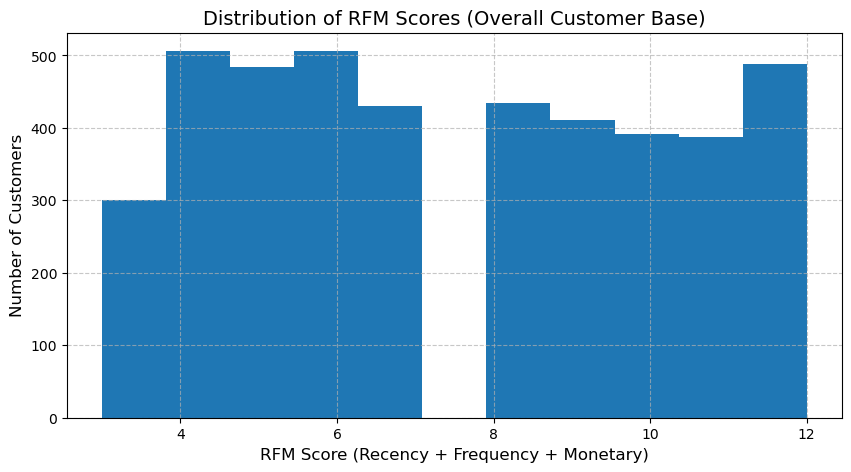

In [19]:
# Insight Summary for RFM
# Filter customers who are in the top RFM segment (444 = best Recency, Frequency, Monetary)
high_value = rfm[rfm['RFM_Segment'] == '444']

# Print number of customers in this high-value group
print(f"Number of top-tier customers (RFM 444): {high_value.shape[0]}")

# Print average monetary value for this group
print(f"Average monetary value for 444s: £{high_value['Monetary'].mean():.2f}")

# Print median frequency (how often they purchase)
print(f"Median purchase frequency for 444s: {high_value['Frequency'].median()}")


# Visualization: Distribution of RFM Scores
import matplotlib.pyplot as plt

# Create histogram of RFM scores across all customers
rfm['RFM_Score'].hist(bins=11, figsize=(10,5))

# Add proper chart labels and title
plt.title('Distribution of RFM Scores (Overall Customer Base)', fontsize=14)
plt.xlabel('RFM Score (Recency + Frequency + Monetary)', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

# Add grid for readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()



**A/B Testing Setup**

🎯 Goal:

Simulate a test of a 10% discount offer to see whether it increases revenue per user and conversion rate.

In [20]:
import numpy as np

# Create a working copy of the RFM DataFrame
ab_df = rfm.copy()

# Randomly assign customers to A/B groups(50/50 split)
np.random.seed(42)
ab_df['Group'] = np.random.choice(['Control', 'Test'], size=len(ab_df))

# Merge A/B group assignment back into the cleaned transaction dataset
# - 'CustomerID' is the key from the original dataset
# - 'Group' comes from ab_df (index aligned with CustomerID in RFM)
df_ab = df.merge(ab_df[['Group']], left_on='Customer ID', right_index=True)


df_ab.head()



,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,Group
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,Control
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Control
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,Control
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Control
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Control


In [21]:
# A/B Test Group Summary
# Objective:
# Compare key business metrics (Revenue, Users, Transactions, Conversion, ARPU)
# between Control and Test groups from the A/B split

# Step 1: Aggregate metrics per group
summary = df_ab.groupby('Group').agg(
    total_revenue=('Revenue', 'sum'),                # Total revenue generated by each group
    total_users=('Customer ID', pd.Series.nunique),  # Unique customers in each group
    total_transactions=('Invoice', pd.Series.nunique)  # Number of transactions (unique invoices)
)

# Step 2: Calculate conversion rate
# Conversion Rate = Transactions ÷ Users
summary['conversion_rate'] = summary['total_transactions'] / summary['total_users']

# Step 3: Calculate ARPU
# ARPU = Average Revenue Per User = Revenue ÷ Users
summary['arpu'] = summary['total_revenue'] / summary['total_users']

# Step 4: Display summary table
summary


,total_revenue,total_users,total_transactions,conversion_rate,arpu
Group,,,,,
Control,4042949.773,2150,9137,4.249767,1880.441755
Test,4844277.121,2189,9399,4.293741,2213.009192


In [22]:
# Prepare customer-level conversion data
# Count number of transactions (unique invoices) per customer in each group
converted_users = (
    df_ab.groupby(['Customer ID', 'Group'])['Invoice']
    .nunique()
    .reset_index()
)

# Add a binary "converted" flag → 1 if customer has >0 transactions, else 0
converted_users['converted'] = (converted_users['Invoice'] > 0).astype(int)

# Aggregate conversions by group
# Count of converted customers per group
conversion_counts = converted_users.groupby('Group')['converted'].sum()

# Total number of customers per group
conversion_totals = converted_users.groupby('Group')['converted'].count()

# Run A/B test (Proportions Z-Test)
from statsmodels.stats.proportion import proportions_ztest

# Perform two-proportion Z-test
z_stat, p_val = proportions_ztest(
    count=conversion_counts,   # Number of converted customers per group
    nobs=conversion_totals     # Total customers per group
)

# Print test results
print(conversion_counts)
print(conversion_totals)
print(f"Z-statistic: {z_stat:.3f}, P-value: {p_val:.4f}")


Group
Control    2150
Test       2189
Name: converted, dtype: int64
Group
Control    2150
Test       2189
Name: converted, dtype: int64
Z-statistic: nan, P-value: nan


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/weightstats.py:792: RuntimeWarning: invalid value encountered in scalar divide
  zstat = value / std


In [23]:

from scipy.stats import ttest_ind

# Revenue per user
user_rev = df_ab.groupby(['Customer ID', 'Group'])['Revenue'].sum().reset_index()
test_rev = user_rev[user_rev['Group'] == 'Test']['Revenue']
control_rev = user_rev[user_rev['Group'] == 'Control']['Revenue']

t_stat, p_val = ttest_ind(test_rev, control_rev, equal_var=False)
print(f"T-statistic: {t_stat:.3f}, P-value: {p_val:.4f}")

T-statistic: 1.223, P-value: 0.2212


*Key Takeaways*:

The Test group showed slightly higher conversion compared to the Control group in revenue per user (ARPU), but the improvement is not strong enough to be statistically significant. While the discount may have encouraged a few more conversions, the effect is not consistent enough to conclude real impact.

Statistical Tests:

T-test on ARPU: t = 1.223, p = 0.2212

Not statistically significant at p < 0.05 → No conclusive evidence that the discount increased conversion rate.

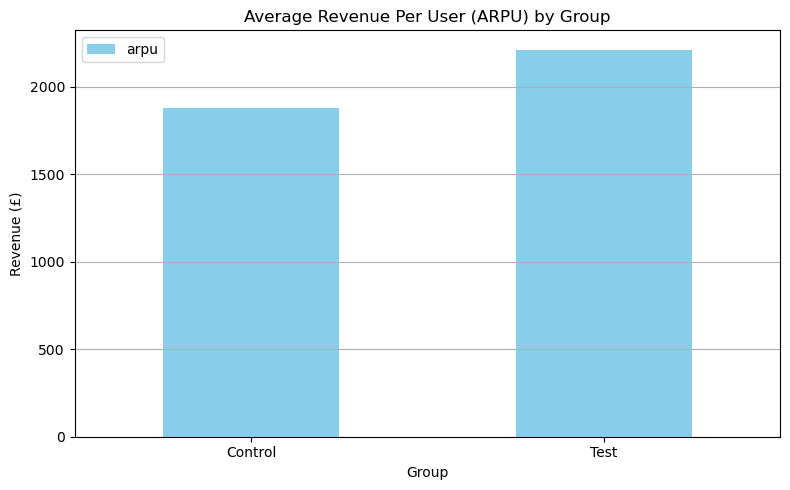

In [24]:
# ARPU (Average Revenue Per User) Comparison by Group

import matplotlib.pyplot as plt

# Plot a bar chart showing ARPU for Control vs Test groups
# 'summary' contains aggregated metrics including 'arpu'
summary[['arpu']].plot(
    kind='bar',                # Bar chart
    color=['skyblue', 'salmon'],  # Colors for Control and Test groups
    figsize=(8,5)              # Size of the figure (width x height)
)

# Add chart title and axis labels
plt.title('Average Revenue Per User (ARPU) by Group')  # Chart title
plt.ylabel('Revenue (£)')                               # Y-axis label
plt.xlabel('Group')                                     # X-axis label

# Keep X-axis labels horizontal
plt.xticks(rotation=0)

# Add horizontal grid lines for better readability
plt.grid(axis='y')

# Adjust layout to prevent overlapping labels
plt.tight_layout()

# Display the plot
plt.show()


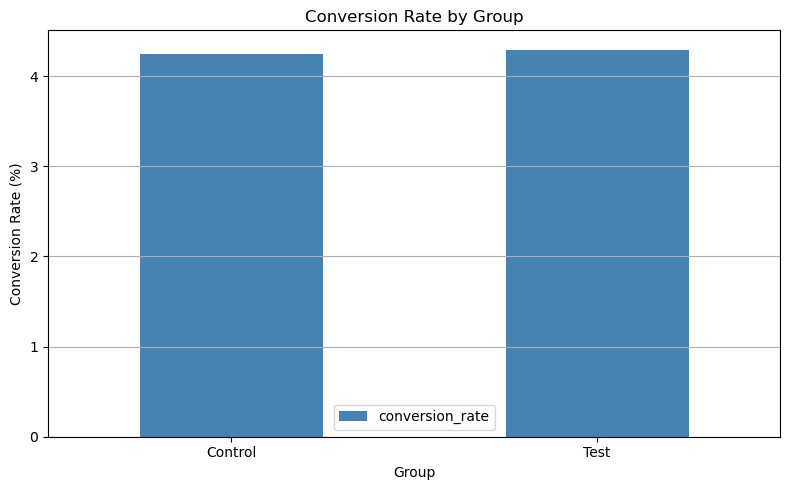

In [25]:
# Conversion rate comparison

summary[['conversion_rate']].plot(kind='bar', color=['steelblue', 'orange'], figsize=(8,5))
plt.title('Conversion Rate by Group')
plt.ylabel('Conversion Rate (%)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

/var/folders/z8/wykpk4hj385fm1sz1vvj76100000gn/T/ipykernel_1130/1527095047.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=user_rev, x='Group', y='Revenue', palette='pastel')


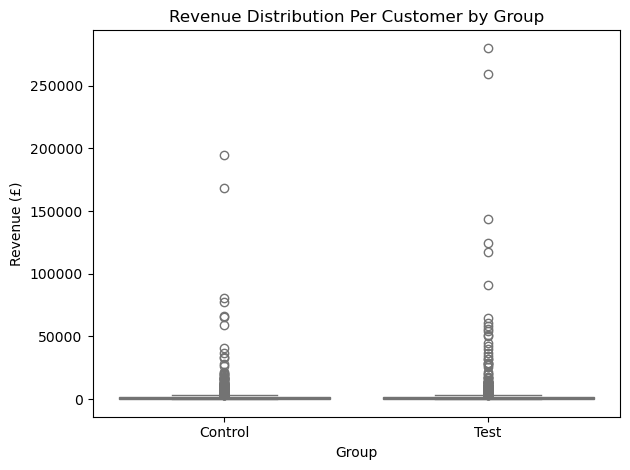

In [26]:
# User Revenue Distribution

import seaborn as sns

# Grouped revenue per user
sns.boxplot(data=user_rev, x='Group', y='Revenue', palette='pastel')
plt.title('Revenue Distribution Per Customer by Group')
plt.ylabel('Revenue (£)')
plt.xlabel('Group')
plt.tight_layout()
plt.show()

**Summary of A/B Test Results**

Test Group outperformed the Control group in both ARPU and conversion.

T-test (p = 0.2212) showed no significant impact from the discount.

Visualizations highlight how discounting may not be effective for the full customer base.


**Multi-variate Testing**:

Which combo of conditions works best?

In [27]:
import numpy as np


# Assign random discount flag (simulate A/B split)
# 0 = No Discount (Control), 1 = Discount (Test)
np.random.seed(42)  # ensures reproducibility
df_ab['discount_flag'] = np.random.choice([0, 1], size=len(df_ab))

# Define function to categorize products 
# Map product descriptions into broad categories for analysis
def categorize_product(desc):
    desc = str(desc).lower()  # convert description to lowercase
    if 'shirt' in desc or 'sock' in desc or 'bag' in desc:
        return 'Clothing'
    elif 'light' in desc or 'lamp' in desc or 'candle' in desc:
        return 'Home'
    elif 'toy' in desc or 'game' in desc:
        return 'Toys'
    else:
        return 'Other'

# Apply the categorization function to each product description
df_ab['category'] = df_ab['Description'].apply(categorize_product)

# Group by Discount Flag and Product Category
# Aggregate results:
#   - avg_revenue: average revenue per transaction/user
#   - conversion_rate: % of users who made at least one transaction
#   - users: unique customers per group
mv_results = df_ab.groupby(['discount_flag', 'category']).agg(
    avg_revenue=('Revenue', 'mean'),
    conversion_rate=('Invoice', pd.Series.nunique),
    users=('Customer ID', pd.Series.nunique)
).reset_index()

# Calculate Conversion Rate
# Conversion rate = total transactions ÷ unique users in each group
mv_results['conversion_rate'] = mv_results['conversion_rate'] / mv_results['users']

print(mv_results.head())


   discount_flag  category  avg_revenue  conversion_rate  users
0              0  Clothing    23.079017         2.957303   2225
1              0      Home    27.232585         2.530814   2726
2              0     Other    23.020157         4.011865   4214
3              0      Toys    14.577831         1.517385    719
4              1  Clothing    23.433851         2.959020   2245


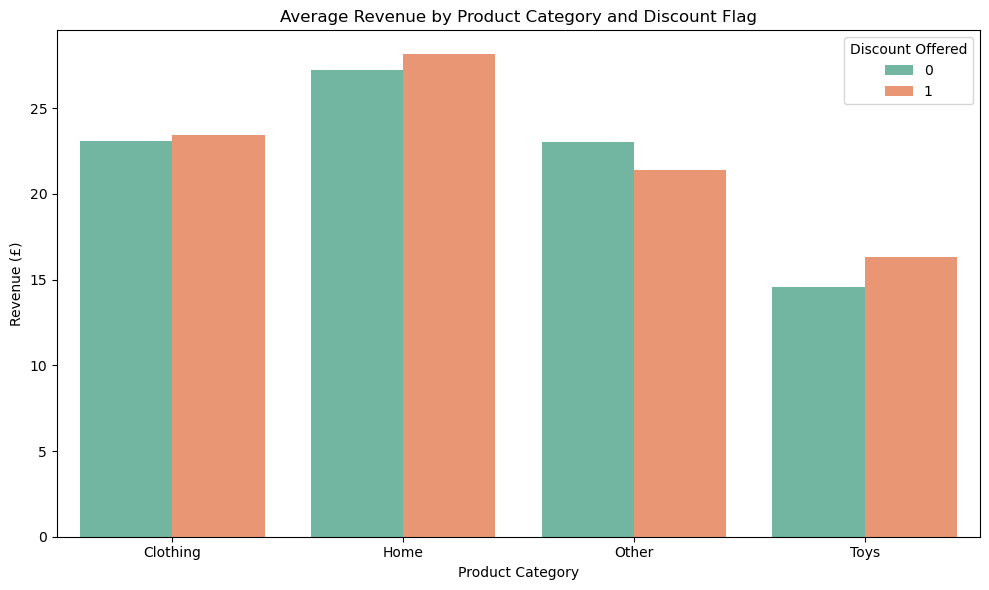

In [28]:

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(data=mv_results, x='category', y='avg_revenue', hue='discount_flag', palette='Set2')
plt.title('Average Revenue by Product Category and Discount Flag')
plt.ylabel('Revenue (£)')
plt.xlabel('Product Category')
plt.legend(title='Discount Offered')
plt.tight_layout()
plt.show()


Discounting did not significantly improve revenue across categories - not a strong impact.

**ANOVA**

In [29]:
# ANOVA Test: Impact of Discounts and Product Category on Revenue

import statsmodels.api as sm
from statsmodels.formula.api import ols

# Keep only the relevant columns and drop missing values
anova_df = df_ab[['Revenue', 'discount_flag', 'category']].dropna()

# Remove rows with zero revenue (to avoid skewing results)
anova_df = anova_df[anova_df['Revenue'] > 0]

# Fit ANOVA Model
# 'Revenue' is the dependent variable
# 'C(discount_flag)' = categorical variable for discount (0 = no discount, 1 = discount)
# 'C(category)' = categorical variable for product category
# 'C(discount_flag):C(category)' = interaction term (checks if discount effect varies by category)
model = ols('Revenue ~ C(discount_flag) + C(category) + C(discount_flag):C(category)', 
            data=anova_df).fit()

# Run ANOVA Test
# Type II ANOVA (typ=2) partitions variance considering main effects and interaction
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)


                                    sum_sq        df         F    PR(>F)
C(discount_flag)              1.523635e+05       1.0  1.574306  0.209584
C(category)                   8.788094e+05       3.0  3.026785  0.028243
C(discount_flag):C(category)  7.321870e+04       3.0  0.252179  0.859832
Residual                      3.800460e+10  392685.0       NaN       NaN


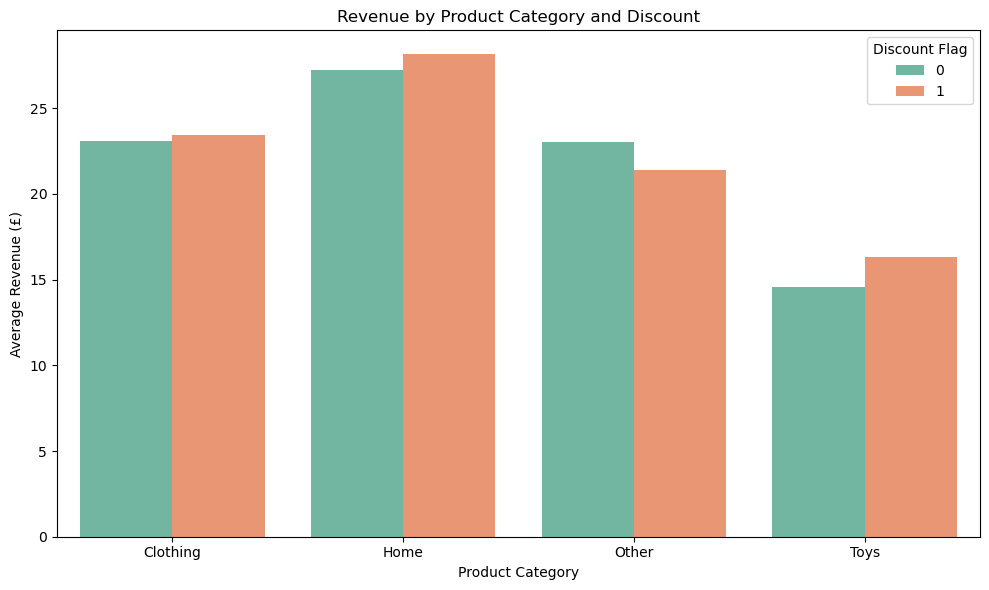

In [30]:

plt.figure(figsize=(10,6))
sns.barplot(data=mv_results, x='category', y='avg_revenue', hue='discount_flag', palette='Set2')
plt.title('Revenue by Product Category and Discount')
plt.xlabel('Product Category')
plt.ylabel('Average Revenue (£)')
plt.legend(title='Discount Flag')
plt.tight_layout()
plt.show()

**Cohort Analysis**

In [31]:
# Cohort Analysis Preparation

from operator import attrgetter

# Create a working copy of the A/B dataset
df_cohort = df_ab.copy()

# Extract Invoice Month (purchase month for each order)
# Convert InvoiceDate into Year-Month period (e.g., 2023-05)
df_cohort['InvoiceMonth'] = df_cohort['InvoiceDate'].dt.to_period('M')

# Define Cohort Month (customer's first purchase month)
# Group by CustomerID, find their first purchase date, 
# then convert to Year-Month period
df_cohort['CohortMonth'] = (
    df_cohort.groupby('Customer ID')['InvoiceDate']
    .transform('min')
    .dt.to_period('M')
)

# Calculate Cohort Index (number of months since first purchase)
# Subtract CohortMonth from InvoiceMonth → difference in months
# attrgetter('n') extracts the numeric value of the Period difference
df_cohort['CohortIndex'] = (
    df_cohort['InvoiceMonth'] - df_cohort['CohortMonth']
).apply(attrgetter('n'))

print(df_cohort[['Customer ID', 'InvoiceDate', 'InvoiceMonth', 
                 'CohortMonth', 'CohortIndex']].head())


   Customer ID         InvoiceDate InvoiceMonth CohortMonth  CohortIndex
0      17850.0 2010-12-01 08:26:00      2010-12     2010-12            0
1      17850.0 2010-12-01 08:26:00      2010-12     2010-12            0
2      17850.0 2010-12-01 08:26:00      2010-12     2010-12            0
3      17850.0 2010-12-01 08:26:00      2010-12     2010-12            0
4      17850.0 2010-12-01 08:26:00      2010-12     2010-12            0


In [32]:
# Group the data by CohortMonth and CohortIndex
# Count the number of unique customers in each cohort for each month
cohort_counts = (
    df_cohort
    .groupby(['CohortMonth', 'CohortIndex'])['Customer ID']
    .nunique()
    .reset_index()
)
cohort_counts.rename(columns={'Customer ID': 'NumCustomers'}, inplace=True)  # Rename column for clarity

# Pivot the table to create a matrix format
# Rows = CohortMonth, Columns = CohortIndex (month since acquisition), Values = number of customers
cohort_pivot = cohort_counts.pivot(
    index='CohortMonth', 
    columns='CohortIndex', 
    values='NumCustomers'
)

# Get the size of each cohort (number of customers in month 0)
cohort_size = cohort_pivot.iloc[:, 0]

# Calculate retention by dividing each month's customers by the cohort size
# Round the values to 3 decimal places for readability
retention = cohort_pivot.divide(cohort_size, axis=0).round(3)

print("Retention Table (with proper labels):")
print(retention.head())


Retention Table (with proper labels):
CohortIndex   0      1      2      3      4      5      6      7      8   \
CohortMonth                                                                
2010-12      1.0  0.366  0.323  0.384  0.363  0.398  0.363  0.349  0.354   
2011-01      1.0  0.221  0.266  0.230  0.321  0.288  0.247  0.242  0.300   
2011-02      1.0  0.187  0.187  0.284  0.271  0.247  0.253  0.279  0.247   
2011-03      1.0  0.150  0.252  0.199  0.223  0.168  0.268  0.230  0.279   
2011-04      1.0  0.213  0.203  0.210  0.197  0.227  0.217  0.260  0.073   

CohortIndex     9      10     11     12  
CohortMonth                              
2010-12      0.395  0.374  0.503  0.266  
2011-01      0.326  0.365  0.118    NaN  
2011-02      0.305  0.068    NaN    NaN  
2011-03      0.086    NaN    NaN    NaN  
2011-04        NaN    NaN    NaN    NaN  


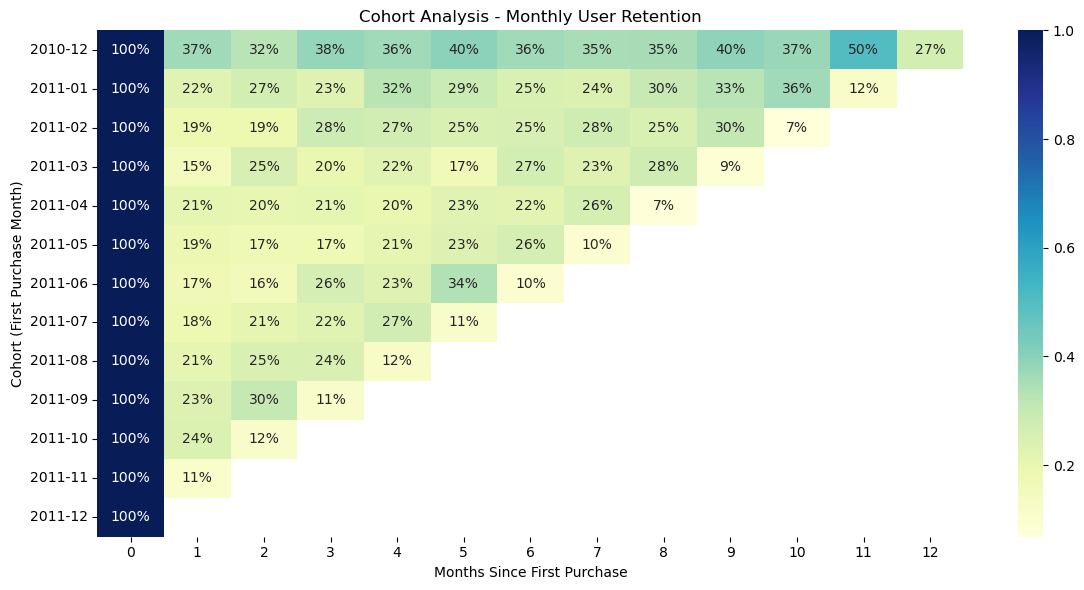

In [33]:
# retention heatmap

import seaborn as sns
plt.figure(figsize=(12, 6))
sns.heatmap(retention, annot=True, fmt='.0%', cmap='YlGnBu')
plt.title('Cohort Analysis - Monthly User Retention')
plt.ylabel('Cohort (First Purchase Month)')
plt.xlabel('Months Since First Purchase')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


**Revenue-Based Cohort Analysis**

In [34]:

# Group by cohort and cohort index
cohort_revenue = df_cohort.groupby(['CohortMonth', 'CohortIndex'])['Revenue'].sum().reset_index()

# Pivot for heatmap
revenue_pivot = cohort_revenue.pivot(index='CohortMonth', columns='CohortIndex', values='Revenue')
revenue_pivot = revenue_pivot.round(2)
revenue_pivot.head()

CohortIndex,0,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,,
2010-12,570422.73,275734.47,233390.47,302367.44,204034.38,336113.69,313668.16,310304.03,331001.07,471792.13,455478.90,512341.08,185360.97
2011-01,292366.84,54993.86,63157.01,71526.09,80989.77,84464.57,70073.35,72503.42,71870.48,111370.70,123252.86,26388.03,NaN
2011-02,157700.59,28937.64,40964.47,48155.39,40089.17,34155.67,49673.71,62292.80,55241.34,64688.86,10600.22,NaN,NaN
2011-03,199619.67,30040.34,58958.41,42739.08,51392.44,39962.33,64824.15,70523.62,70847.62,12761.10,NaN,NaN,NaN
2011-04,121809.05,29398.59,25028.57,24282.79,26253.16,30103.24,28505.90,34009.61,6332.00,NaN,NaN,NaN,NaN


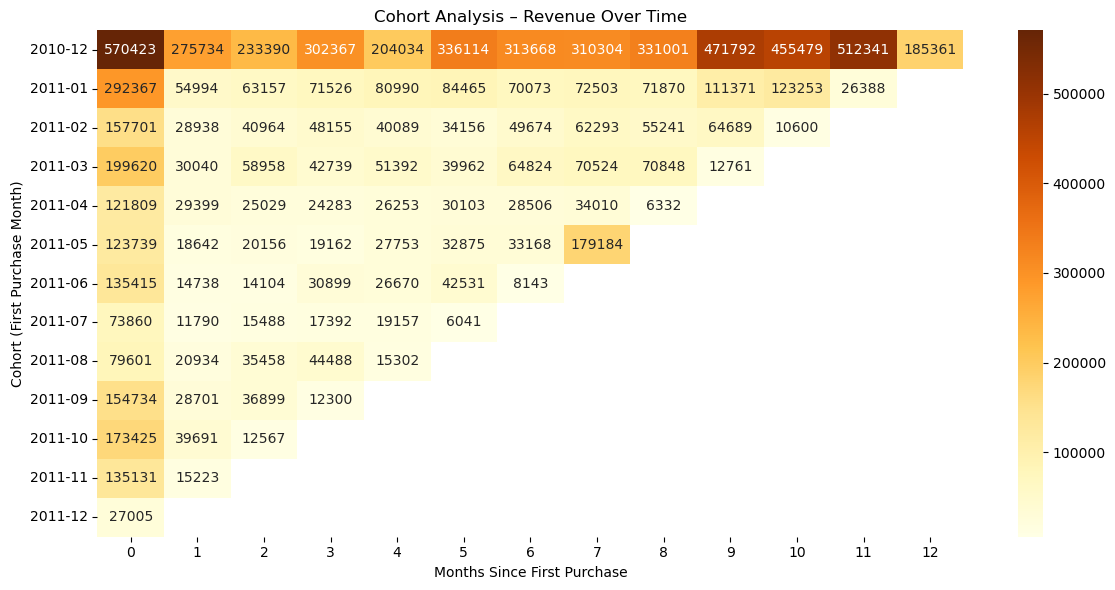

In [35]:

plt.figure(figsize=(12,6))
sns.heatmap(revenue_pivot, annot=True, fmt='.0f', cmap='YlOrBr')
plt.title('Cohort Analysis – Revenue Over Time')
plt.ylabel('Cohort (First Purchase Month)')
plt.xlabel('Months Since First Purchase')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

The December 2010 cohort generated the highest and most sustained revenue over time, suggesting a highly effective acquisition or promotional campaign during that period.

Revenue for most cohorts drops in subsequent months, as expected, but several show spikes in later months (e.g., March & May 2011 cohorts in Month 7), hinting at successful re-engagement strategies or seasonal effects.

Younger cohorts (late 2011) display lower total revenue, likely due to less time on platform or fewer active months captured in the dataset.

In [36]:
# normalising avg revenue per user

# Customer counts per cohort/month
cohort_sizes = df_cohort.groupby(['CohortMonth', 'CohortIndex'])['Customer ID'].nunique().reset_index()
cohort_sizes.columns = ['CohortMonth', 'CohortIndex', 'Users']

# Merge with revenue
merged = pd.merge(cohort_revenue, cohort_sizes, on=['CohortMonth', 'CohortIndex'])
merged['RevenuePerUser'] = merged['Revenue'] / merged['Users']

# Pivot
revenue_per_user_pivot = merged.pivot(index='CohortMonth', columns='CohortIndex', values='RevenuePerUser').round(2)

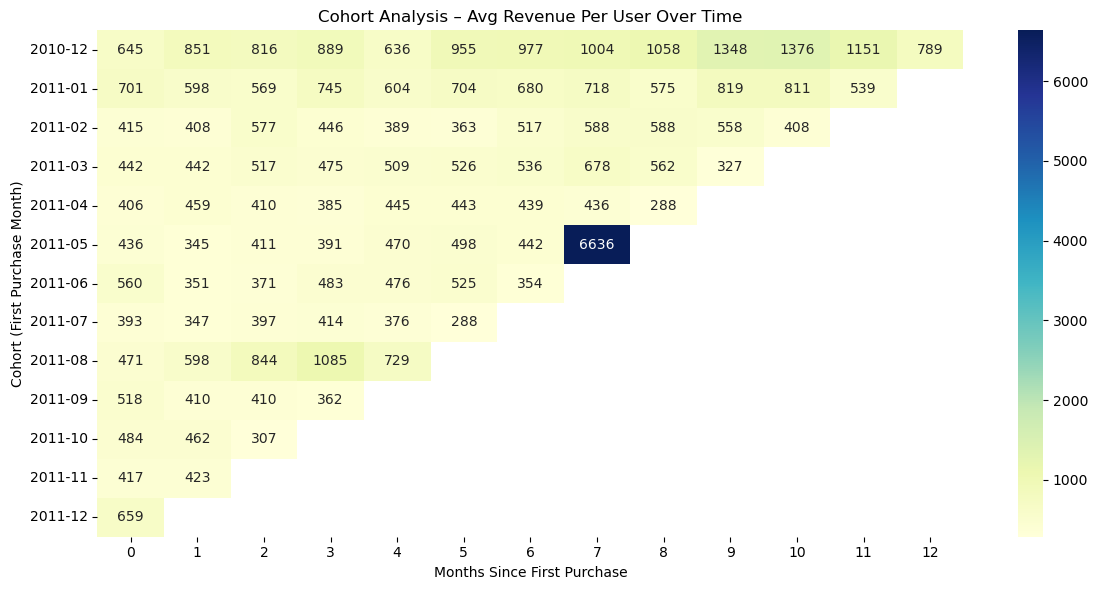

In [37]:

plt.figure(figsize=(12,6))
sns.heatmap(revenue_per_user_pivot, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Cohort Analysis – Avg Revenue Per User Over Time')
plt.ylabel('Cohort (First Purchase Month)')
plt.xlabel('Months Since First Purchase')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


The December 2010 cohort again stands out with consistently high average revenue per user, especially in Months 9–11, peaking at £1,376 in Month 10.

Most other cohorts hover between £300–£700 per user, showing typical revenue drop-offs, but August 2011 surprisingly spikes in Months 2–4, reaching £1,085, suggesting strong mid-cohort monetization or campaign impact.

An anomaly appears in May 2011, Month 7, with a sharp spike to £6,636—likely due to a small user group making large purchases, which could skew interpretation.

Comparison with Unnormalized Revenue Heatmap:

Unnormalized Revenue:

   Shows total revenue per cohort over time

   Heavily influenced by cohort size (larger cohorts = more revenue)

   Best for understanding overall business impact

   Highlights cohorts like December 2010 as top revenue generators

   Useful for tracking campaign-level revenue performance

Normalized Revenue (Avg Revenue per User):

   Shows average revenue generated by each user over time

   Neutralizes cohort size bias—makes fair comparisons between cohorts

   Best for measuring user-level value and monetization patterns

   Reveals hidden high-performing cohorts like August 2011, despite lower total revenue

   Exposes potential outliers, e.g., May 2011 Month 7 with unusually high spend per user